State Fidelity: 0.9799220741192869
Circuit depth: 6
Number of qubits: 5
Number of gates: OrderedDict([('measure', 5), ('cx', 4), ('h', 1)])


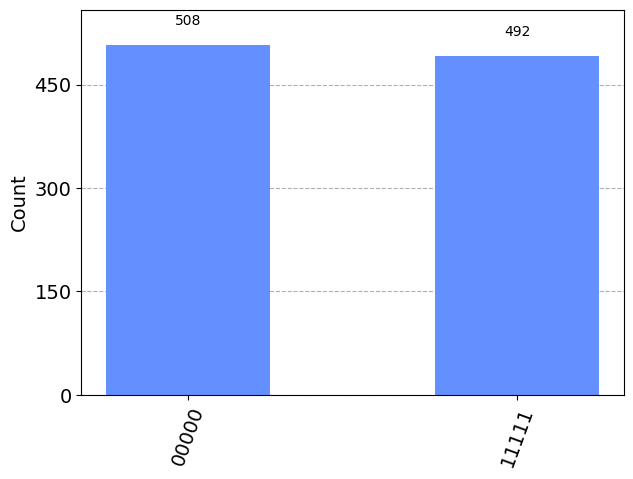

In [14]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeVigo
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import plot_histogram



aer_sim = AerSimulator()
vigo = FakeVigo()

def ghz_circuit(num_q):
    circuit = QuantumCircuit(num_q, num_q)
    circuit.h(0)
    for i in range(num_q - 1):
        circuit.cx(i, i + 1)

    for j in range(num_q):
        circuit.measure(j, j)  

    return circuit

def ghz_fidelity_check(num_q):
    circuit = ghz_circuit(num_q)
    circuit.save_density_matrix()
    perfect_result = aer_sim.run(circuit).result().data()['density_matrix']
    noisy_result = vigo.run(circuit).result().data()['density_matrix']
    
    return state_fidelity(perfect_result, noisy_result)

n = 5

fidelity = ghz_fidelity_check(n)
print(f"State Fidelity: {fidelity}")



ghz_circuit_instance = ghz_circuit(n)
circuit_depth = ghz_circuit_instance.depth()
num_qubits = ghz_circuit_instance.num_qubits

# Calculate the number of gates
gate_count = ghz_circuit_instance.count_ops()

print(f"Circuit depth: {circuit_depth}")
print(f"Number of qubits: {num_qubits}")
print(f"Number of gates: {gate_count}")

# Running a simulation
sim = AerSimulator()
job = sim.run(ghz_circuit_instance, shots=1000)
result = job.result()
counts = result.get_counts()

# Plotting the histogram
plot_histogram(counts)


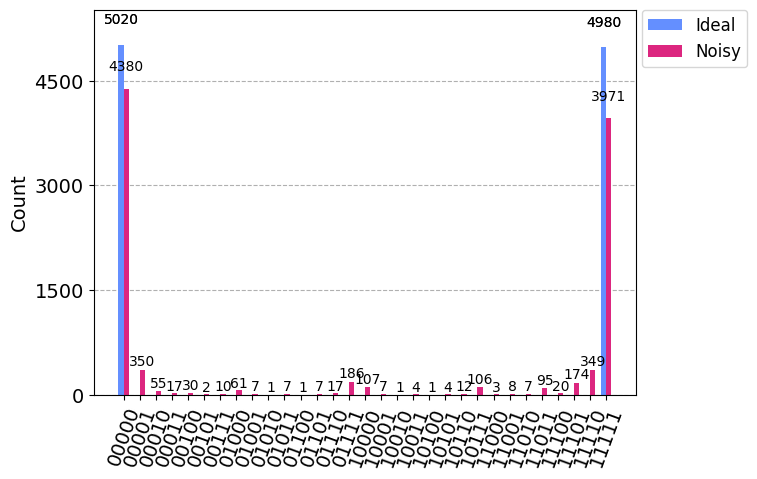

In [15]:
# Run the circuit on the noiseless simulator
job_ideal = aer_sim.run(ghz_circuit_instance, shots=10000)
result_ideal = job_ideal.result()
counts_ideal = result_ideal.get_counts()

# Run the circuit on the noisy simulator
job_noisy = vigo.run(ghz_circuit_instance, shots=10000)
result_noisy = job_noisy.result()
counts_noisy = result_noisy.get_counts()

# Plotting the histogram to compare both results
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])

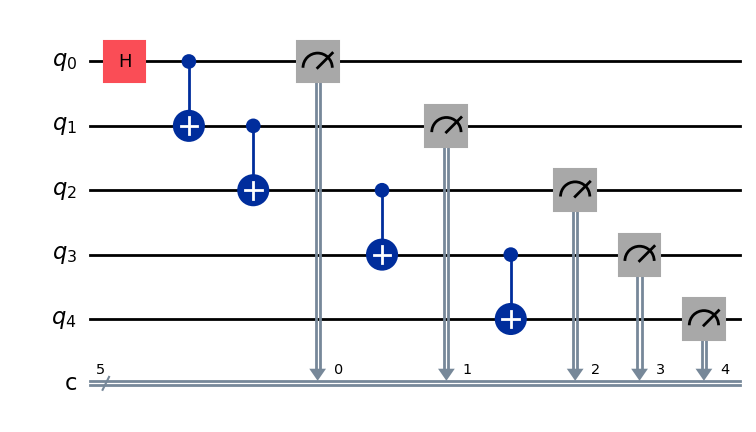

In [6]:
# To draw the GHZ circuit
ghz_circuit_instance.draw(output='mpl')

State Fidelity: 0.963656638198307
Circuit depth: 10
Number of qubits: 5
Number of gates: OrderedDict([('measure', 7), ('cx', 6), ('h', 3), ('x', 3), ('reset', 2)])


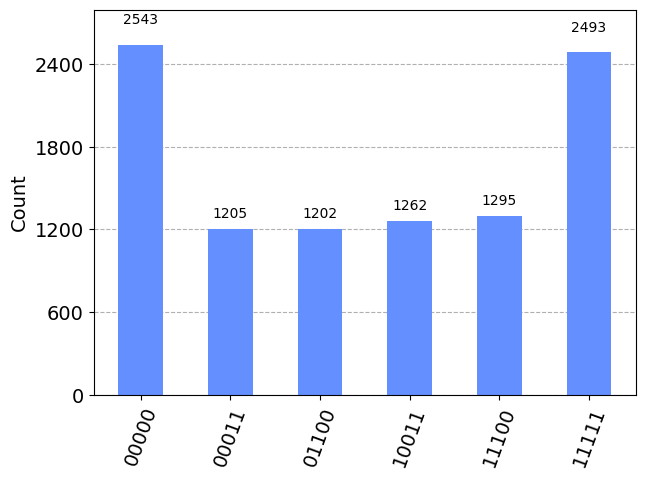

In [64]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit


aer_sim = AerSimulator(seed_simulator=seed_simulator)
vigo = FakeVigo()

def ghz_dynamic_circuit(num_q):
    qreg_q = QuantumRegister(5, 'q')
    creg_c = ClassicalRegister(5, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[4])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.cx(qreg_q[4], qreg_q[3])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.x(qreg_q[2]).c_if(creg_c, 1)
    circuit.x(qreg_q[3]).c_if(creg_c, 0)
    circuit.measure(qreg_q[3], creg_c[3])
    circuit.x(qreg_q[4]).c_if(creg_c, 0)
    circuit.reset(qreg_q[1])
    circuit.reset(qreg_q[3])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[3])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[2], creg_c[2])
    circuit.measure(qreg_q[3], creg_c[3])
    circuit.measure(qreg_q[4], creg_c[4]) 

    return circuit

def ghz_dynamic_fidelity_check(num_q):
    # Create the GHZ circuit using the ghz_circuit function
    circuit = ghz_dynamic_circuit(num_q)

    # Save the density matrix
    circuit.save_density_matrix()

    # Run the circuit on a perfect and a noisy simulator
    perfect_result = aer_sim.run(circuit).result().data()['density_matrix']
    noisy_result = vigo.run(circuit).result().data()['density_matrix']

    # Calculate and return the state fidelity
    return state_fidelity(perfect_result, noisy_result)

# Define the number of qubits
n = 5

# Call the fidelity check function and print the result
fidelity = ghz_dynamic_fidelity_check(n)
print(f"State Fidelity: {fidelity}")

# Create the GHZ circuit for further analysis
ghz_dynamic_circuit_instance = ghz_dynamic_circuit(n)

# Get the depth of the circuit
circuit_depth = ghz_dynamic_circuit_instance.depth()

# Get the number of qubits in the circuit
num_qubits = ghz_dynamic_circuit_instance.num_qubits

# Calculate the number of gates
gate_count = ghz_dynamic_circuit_instance.count_ops()

print(f"Circuit depth: {circuit_depth}")
print(f"Number of qubits: {num_qubits}")
print(f"Number of gates: {gate_count}")

# Running a simulation
sim_d = AerSimulator()
job_d = sim_d.run(ghz_dynamic_circuit_instance, shots=10000)
result_d = job_d.result()
counts_d = result_d.get_counts()

# Plotting the histogram
plot_histogram(counts_d)

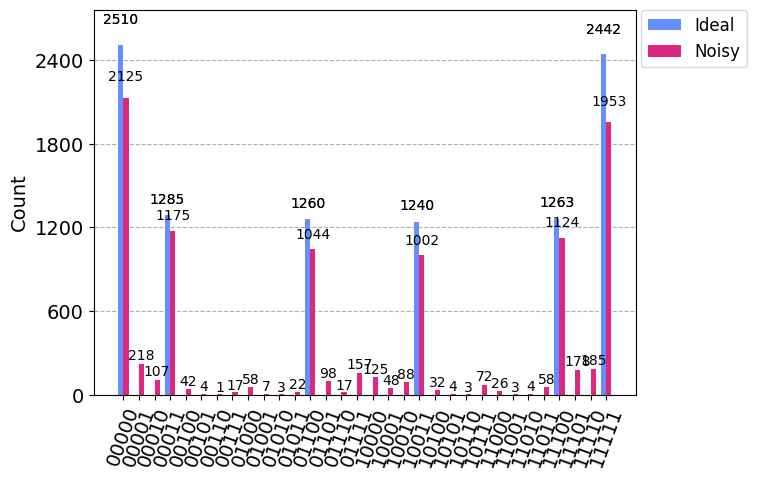

In [65]:
# Run the circuit on the noiseless simulator
job_ideal = aer_sim.run(ghz_dynamic_circuit_instance, shots=10000)
result_ideal = job_ideal.result()
counts_ideal = result_ideal.get_counts()

# Run the circuit on the noisy simulator
job_noisy = vigo.run(ghz_dynamic_circuit_instance, shots=10000)
result_noisy = job_noisy.result()
counts_noisy = result_noisy.get_counts()

# Plotting the histogram to compare both results
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])

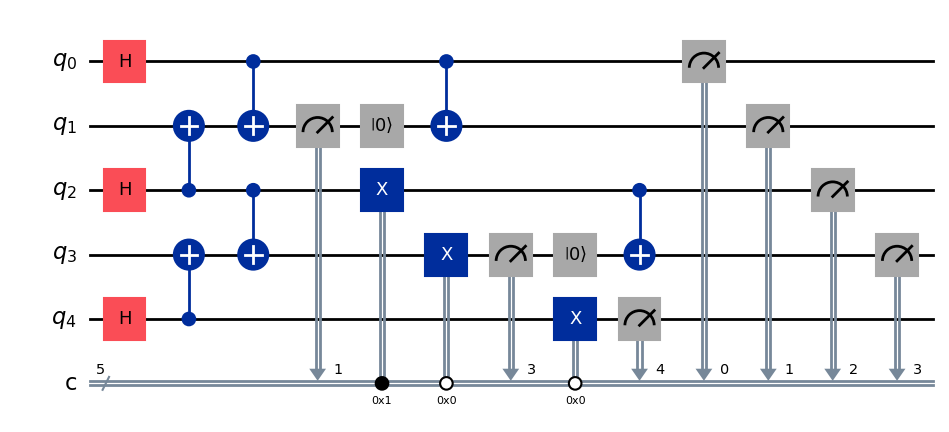

In [66]:
# To draw the GHZ circuit
ghz_dynamic_circuit_instance.draw(output='mpl')